# Customer Churn Prediction

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dir = '/content/drive/MyDrive/Encryptix/Customer Churn Prediction'
os.chdir(dir)
print(os.getcwd())
print(os.listdir())

/content/drive/MyDrive/Encryptix/Customer Churn Prediction
['Churn_Modelling.csv']


### Data Preparation

In [13]:
data = pd.read_csv('Churn_Modelling.csv')

In [14]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
np.bincount(data['Exited'])

array([7963, 2037])

### Distribution of Target Class

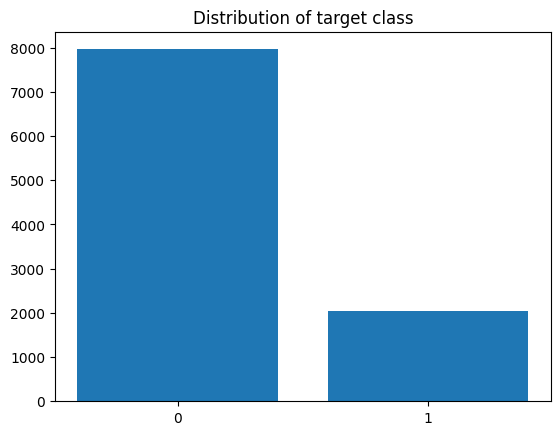

In [20]:
plt.bar([0,1],np.bincount(data['Exited']))
plt.title('Distribution of target class')
plt.xticks([0, 1])
plt.show()

The class imbalance is evident, with samples labeled as class 0 is approx 3 times of samples labeled as 1.

### Data Analysis

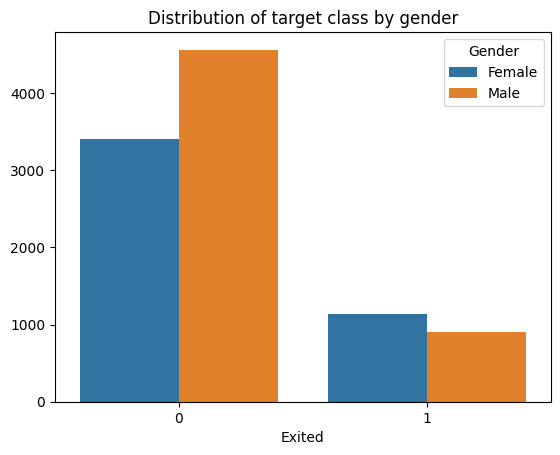

In [21]:
sns.barplot(data=data, x='Exited',y=[1]*len(data),hue='Gender',estimator=np.sum)
plt.title('Distribution of target class by gender')
plt.show()

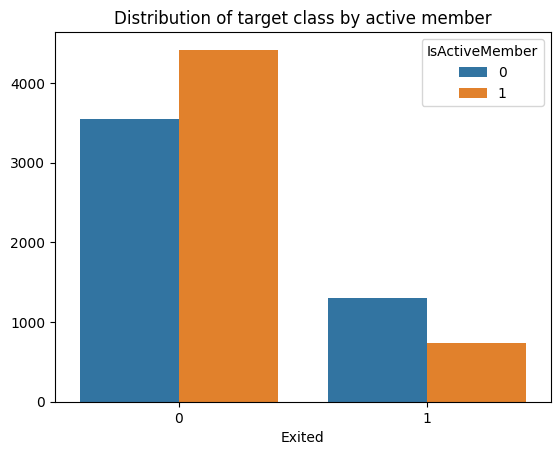

In [22]:
sns.barplot(data=data, x='Exited',y=[1]*len(data),hue='IsActiveMember',estimator=np.sum)
plt.title('Distribution of target class by active member')
plt.show()

In [23]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True) #dropping un-necessary columns

In [24]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Label Encoding

In [25]:
#label encoding
def label_encoder(data, cols):
  for col in cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
  return data
data = label_encoder(data,cols=['Geography','Gender'])

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42,stratify=data['Exited'])

In [ ]:
np.bincount(train_data['Exited'])

array([6370, 1630])

In [ ]:
np.bincount(test_data['Exited'])

array([1593,  407])

### Training Models

Random Forest

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



<Axes: >

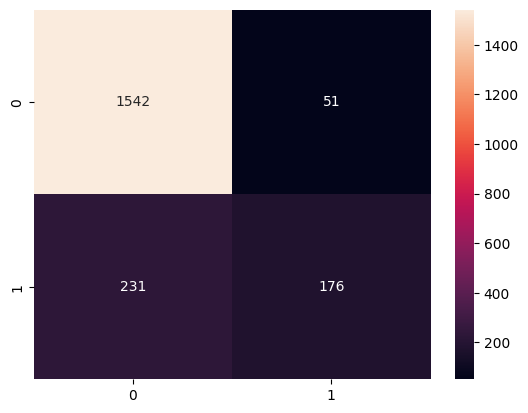

In [ ]:
clf = RandomForestClassifier(n_estimators=400, random_state=42)
clf.fit(train_data.drop('Exited',axis=1),train_data['Exited'])
predictions = clf.predict(test_data.drop('Exited',axis=1))
print(classification_report(test_data['Exited'],predictions))
cm = confusion_matrix(test_data['Exited'],predictions)
sns.heatmap(cm, annot=True,fmt='.0f')

Naive Bayes

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.35      0.06      0.11       407

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.49      2000
weighted avg       0.71      0.79      0.72      2000



<Axes: >

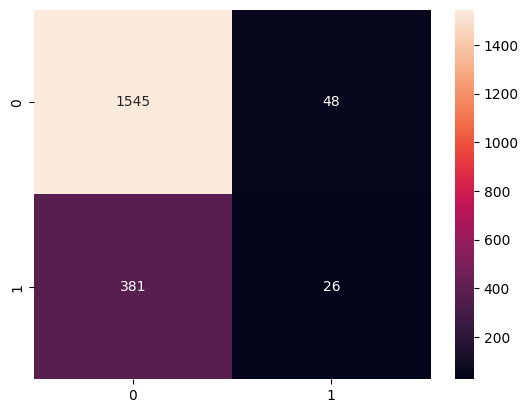

In [ ]:
clf_2 = GaussianNB()
clf_2.fit(train_data.drop('Exited',axis=1),train_data['Exited'])
predictions_2 = clf_2.predict(test_data.drop('Exited',axis=1))
print(classification_report(test_data['Exited'],predictions_2))
cm_2 = confusion_matrix(test_data['Exited'],predictions_2)
sns.heatmap(cm_2, annot=True,fmt='.0f')

AdaBoost

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



<Axes: >

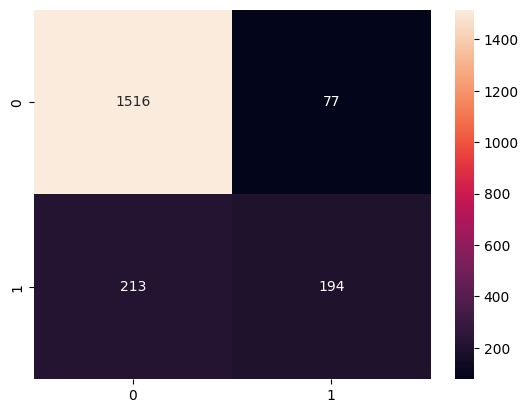

In [ ]:
clf_3 = AdaBoostClassifier()
clf_3.fit(train_data.drop('Exited',axis=1),train_data['Exited'])
predictions_3 = clf_3.predict(test_data.drop('Exited',axis=1))
print(classification_report(test_data['Exited'],predictions_3))
cm_3 = confusion_matrix(test_data['Exited'],predictions_3)
sns.heatmap(cm_3, annot=True,fmt='.0f')

We can observe that RandomForest is performing well with an accuracy of 0.86

Since the data is class imbalanced with class 1 minor class, we can observe low recall and f1-score for class 1. we can increase f1-score of class 1 by increasing weights for samples of class 1.

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.66      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.75      2000
weighted avg       0.84      0.82      0.83      2000



<Axes: >

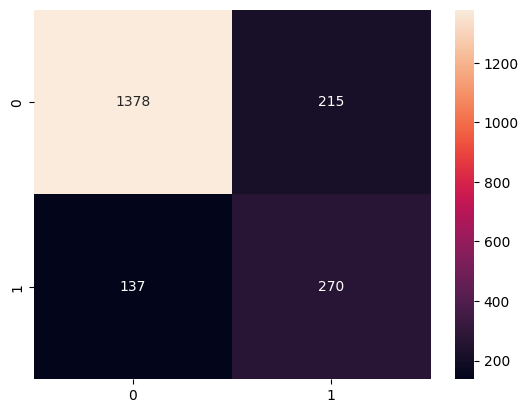

In [ ]:
bc = np.bincount(train_data['Exited'])
w = np.array([1,2.5])  # weights for class 1 is more
weights = w[train_data['Exited']]
weights = weights/weights.sum()
clf_3 = AdaBoostClassifier()
clf_3.fit(train_data.drop('Exited',axis=1),train_data['Exited'],sample_weight=weights)
predictions_3 = clf_3.predict(test_data.drop('Exited',axis=1))
print(classification_report(test_data['Exited'],predictions_3))
cm_3 = confusion_matrix(test_data['Exited'],predictions_3)
sns.heatmap(cm_3, annot=True,fmt='.0f')